In [2]:
import import_ipynb
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from image_processing_functions import read_image, canny_edge_response, \
    automatic_canny_edge_response, harris_corner_response, hough_line_detect_response, \
    hough_line_intersections, houghp_line_detect_response, houghp_line_points


In [3]:
filename = 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg'

# K-means clusterization of obtained data from Hough transform - clustering the obtained lines or their intersections?

{'path_img': 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg',
 'new_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
     

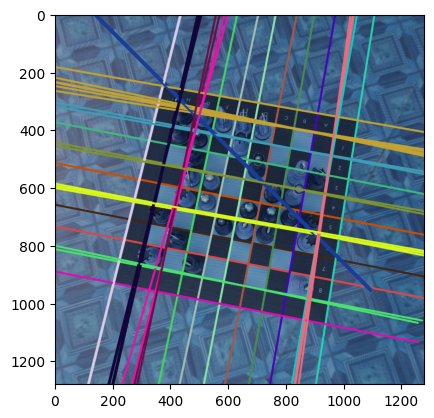

In [9]:
from sklearn.cluster import KMeans

def kmeans_cluster_lines(filename, lines, n_clusters=22):

    # In k-means, we should know exactly the number of clusters
    # For detecting lines in chesssboard images, we have
    # 9x2 chess margins (horizontal and vertical) + 4 board margins = 22 groups of lines
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(lines)
    cluster_ids = kmeans.labels_
    unique_clusters = np.unique(cluster_ids)

    image_copy = cv.imread(filename)

    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in unique_clusters}
    for line, cluster_id in zip(lines, cluster_ids):
        cv.line(image_copy, (line[0], line[1]), (line[2], line[3]), cluster_colors[cluster_id], 5)
    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in unique_clusters}
    for i in range(len(cluster_ids)):
        cluster_dict[cluster_ids[i]].append(lines[i])

    clusters_found = {
        'path_img': filename,
        'new_img': image_copy,
        'dict': cluster_dict
    }

    return clusters_found

lines = hough_line_detect_response(read_image(filename))
kmeans_cluster_lines(filename, lines['coords'], 24)

## Calculating the mean of these lines in order to obtain a single one

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

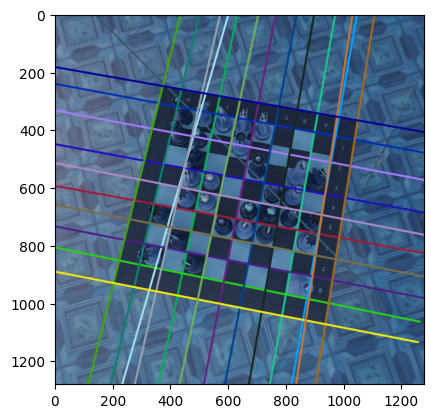

In [10]:
def augment_kmcluster_lines(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1]), np.mean(np.array(values)[:, 2]), np.mean(np.array(values)[:, 3])) for key, values in cluster_dict['dict'].items() if values != []}

    image_copy = cv.imread(cluster_dict['path_img'])
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_line in augmented_cluster.items():
        cv.line(image_copy, (round(cluster_line[0]), round(cluster_line[1])), (round(cluster_line[2]), round(cluster_line[3])), cluster_colors[cluster_id], 5)

    plt.imshow(image_copy)
    clusters_found = {
        'img': image_copy,
        'dict': augmented_cluster
    }
    return clusters_found

kmclusters = kmeans_cluster_lines(filename, lines['coords'], 24)
augment_kmcluster_lines(kmclusters)

# K-means clusterization of intersections

{'path_img': 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg',
 'new_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
     

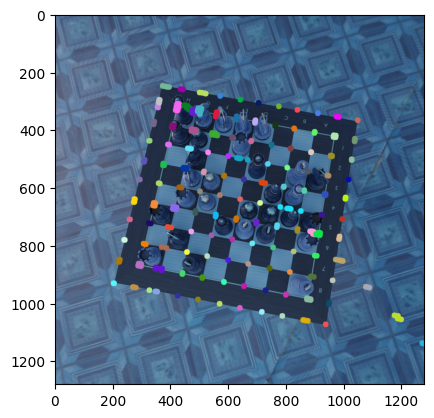

In [25]:
# k-means for line intersection points - this includes intersections of chessboard lines with the table margins
# In this case we would have 11x11 cluster points = 121 clusters
# We will put 81 cluster points as the default for this function in order to avoid the case of clustering a number of points lesser than the introduced number of clusters: n_clusters <= n_points

def kmeans_cluster_points(filename, points, n_clusters=81):
    # distances = pdist(points, metric='euclidean')
    # links = linkage(distances, method='ward')
    # clusters = fcluster(links, 15, criterion='distance')
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(points)
    cluster_ids = kmeans.labels_
    unique_clusters = np.unique(cluster_ids)

    image_copy = cv.imread(filename)
    # image_copy = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in unique_clusters}
    for point, cluster_id in zip(points, cluster_ids):
        cv.circle(image_copy, (round(point[0]), round(point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in unique_clusters}
    for i in range(len(cluster_ids)):
        cluster_dict[cluster_ids[i]].append(points[i])

    clusters_found = {
        'path_img': filename,
        'new_img': image_copy,
        'dict': cluster_dict
    }

    return clusters_found

inters = hough_line_intersections(read_image(filename))
kmeans_cluster_points(filename, inters['list'], 128)

## Transforming the clusters of points into a single one

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

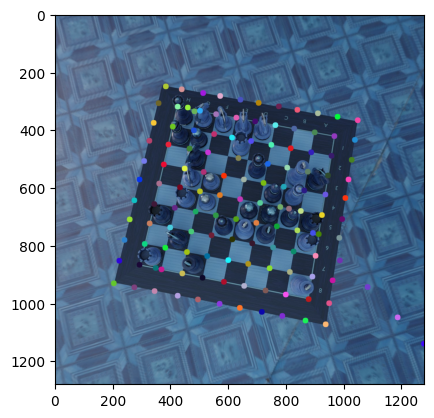

In [13]:
def augment_kmcluster_points(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1])) for key, values in cluster_dict['dict'].items() if values != []}

    image_copy = cv.imread(cluster_dict['path_img'])
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_point in augmented_cluster.items():
        cv.circle(image_copy, (round(cluster_point[0]), round(cluster_point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)
    clusters_found = {
        'img': image_copy,
        'dict': augmented_cluster
    }

    return clusters_found

kmpoints = kmeans_cluster_points(filename, inters['list'], 128)
augment_kmcluster_points(kmpoints)

# K-means clusterization of lines from HoughLinesP()

{'path_img': 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg',
 'new_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
     

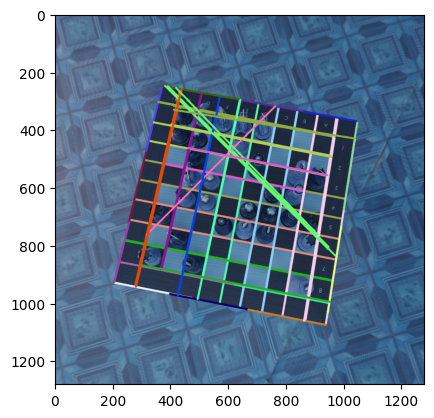

In [29]:
def houghp_kmeans_cluster_lines(filename, lines, n_clusters=24):
    list_of_lines = []
    for line_list in lines['list'].tolist():
        list_of_lines.append(line_list.pop())
    return kmeans_cluster_lines(filename, list_of_lines, n_clusters)

houghp_lines = houghp_line_detect_response(read_image(filename), threshold=90, minLineLength=100, maxLineGap=150)
houghp_kmeans_cluster_lines(filename, houghp_lines, 27)

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

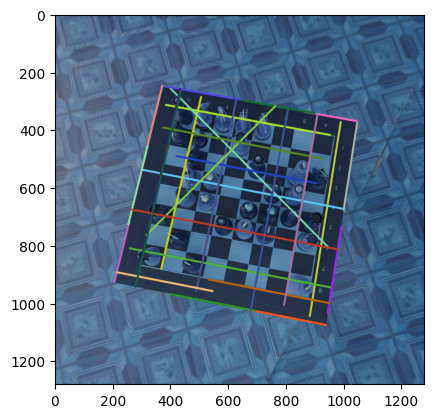

In [30]:
houghp_kmeans = houghp_kmeans_cluster_lines(filename, houghp_lines, 27)
augment_kmcluster_lines(houghp_kmeans)

# K-means clusterization of coordinate points of lines obtained from HoughLinesP()

{'path_img': 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg',
 'new_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
     

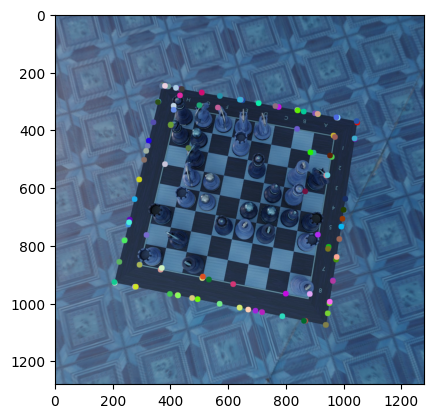

In [27]:
def houghp_kmeans_cluster_points(filename, points, n_clusters=81):
    return kmeans_cluster_points(filename, points['list'], n_clusters)

point_list = houghp_line_points(read_image(filename))
houghp_kmeans_cluster_points(filename, point_list, 121)

{'img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  95, 1

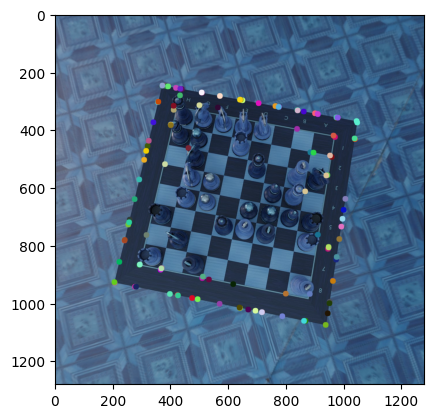

In [28]:
kmpointsp = houghp_kmeans_cluster_points(filename, point_list, 121)
augment_kmcluster_points(kmpointsp)